In [1]:
!apt install fonts-nanum -y #한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,836 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/s

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumGothic')
matplotlib.matplotlib_fname()
print(plt.rcParams['font.family'])

['NanumGothic']


In [2]:
!git clone https://github.com/ndb796/bing_image_downloader #이미지 크롤링에 필요한 라이브러리

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), 17.48 KiB | 577.00 KiB/s, done.


In [3]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [4]:
query = '벤치프레스 머신'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://image.auction.co.kr/itemimage/1b/f8/fb/1bf8fba666.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://blogthumb.pstatic.net/20151013_206/sallydreamer_144474434171560Ibc_JPEG/NaverBlog_20151013_225221_03.jpg?type=w2)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://postfiles5.naver.net/MjAxNzA2MDZfNTMg/MDAxNDk2NzU0NzM4NTYy.vBMbHtSPdeSH0nMnuSKM-toCGJkx5Qcenpw6q8omV0Yg.LmQM2E72XNY6fl-2i9WDRMHXgTmIXigKzSk-p-aya4cg.JPEG.revivaldive/image_8968970541496754603597.jpg?type=w966)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://www.yanrefitness.com/wp-content/uploads/2021/07/Fig-3-Adjustable-Decline-Bench-Press-Machine--1024x993.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://image.auction.co.kr/itemimage/1d/0b/34/1d0b3458e5.jpg)
[Info] Issue getting: http://image.auction.co.kr/itemimage/1d/0b/34/1d0b3458e5.jpg
[Error] HTTP Error 404: Not Found
#5 이미지 다운로드 (https://www.yanrefitness.com/wp-content/uploads/2021/04/73-Flat-Decline-Adjustable

In [5]:
query = '렛풀다운머신'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 37 Images on Page 1.
#1 이미지 다운로드 (http://image.auction.co.kr/itemimage/10/f5/97/10f597b6b6.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://gi.esmplus.com/frogfit/product/20200911_let-pull-down-block-2-2.gif)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://www.bing.com/th/id/OGC.7b259e3bed72f4a404ddbdff7916a865?pid=1.7&amp;rurl=http%3a%2f%2fgi.esmplus.com%2ffrogfit%2fproduct%2f20200911_let-pull-down-block-2-2.gif&amp;ehk=V8oca0dVukRv7xMn%2bXu43Udm0mIehZCpOKRNtmj60hI%3d)
[Info] Issue getting: https://www.bing.com/th/id/OGC.7b259e3bed72f4a404ddbdff7916a865?pid=1.7&amp;rurl=http%3a%2f%2fgi.esmplus.com%2ffrogfit%2fproduct%2f20200911_let-pull-down-block-2-2.gif&amp;ehk=V8oca0dVukRv7xMn%2bXu43Udm0mIehZCpOKRNtmj60hI%3d
[Error] HTTP Error 404: Not Found
#3 이미지 다운로드 (https://img.g2b.go.kr:7073/Resource/CataAttach/XezCatalog/XZMOK/move_image/2019/08/19/90483a7b-e101-4ea7-89ad-4c509dc27da3.jpg)
[Info] Issue getting: https://img.g2b.go.kr:7073/Resource/CataAttach/XezC

In [6]:
query = '숄더프레스머신'
downloader.download(query, limit=40,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://img.danawa.com/prod_img/500000/461/377/img/2377461_1.jpg?shrink=500:500&amp;_v=20131223172329)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://img.danawa.com/prod_img/500000/901/376/img/2376901_1.jpg?shrink=500:500&amp;_v=20131223152111)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://cafefiles.naver.net/20140713_220/atopsport_1405247173180DjGAe_JPEG/%BC%F1%B4%F5%C7%C1%B7%B9%BD%BA.JPG)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Fblog.kakaocdn.net%2Fdn%2FrdJn3%2FbtqBzPwfasn%2FGfADGIVnh5KjH32lKiE7uK%2Fimg.jpg)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Fblog.kakaocdn.net%2Fdn%2FrdJn3%2FbtqBzPwfasn%2FGfADGIVnh5KjH32lKiE7uK%2Fimg.jpg
[Error] HTTP Error 403: Forbidden
#4 이미지 다운로드 (http://sfamall.com/web/product/small/201608/259_shop1_469900.jpg)
[Info] Issue getting: http://sfamall.com/web/product/small/20

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [8]:
!rm -rf `find -type d -name .ipynb_checkpoints`
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'),transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=3, shuffle=True, num_workers=3)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=3, shuffle=True, num_workers=3)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 86
테스트 데이터셋 크기: 30
클래스: ['렛풀다운머신', '벤치프레스 머신', '숄더프레스머신']


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


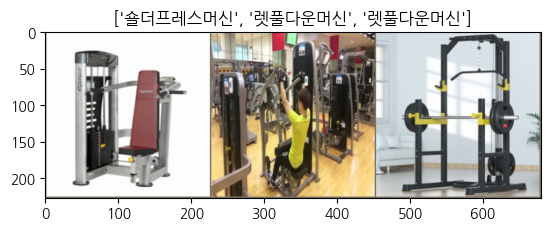

In [9]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# # 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
len(inputs)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [10]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 33.9MB/s]


In [11]:
num_epochs = 30
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.1805 Acc: 36.0465% Time: 9.9707s
#1 Loss: 0.9239 Acc: 58.1395% Time: 12.0098s
#2 Loss: 0.5886 Acc: 79.0698% Time: 13.6112s
#3 Loss: 0.4967 Acc: 79.0698% Time: 15.1701s
#4 Loss: 0.3987 Acc: 83.7209% Time: 16.7611s
#5 Loss: 0.8373 Acc: 75.5814% Time: 18.3120s
#6 Loss: 0.6617 Acc: 74.4186% Time: 19.8944s
#7 Loss: 0.8461 Acc: 77.9070% Time: 21.5924s
#8 Loss: 0.4027 Acc: 81.3953% Time: 24.1958s
#9 Loss: 0.6084 Acc: 80.2326% Time: 25.7523s
#10 Loss: 0.6814 Acc: 81.3953% Time: 27.3187s
#11 Loss: 0.5505 Acc: 80.2326% Time: 28.9780s
#12 Loss: 0.4740 Acc: 77.9070% Time: 30.5630s
#13 Loss: 0.7447 Acc: 77.9070% Time: 32.1588s
#14 Loss: 0.4648 Acc: 86.0465% Time: 33.7219s
#15 Loss: 0.5362 Acc: 84.8837% Time: 36.1626s
#16 Loss: 0.3753 Acc: 88.3721% Time: 38.1776s
#17 Loss: 0.3719 Acc: 88.3721% Time: 39.7339s
#18 Loss: 0.1836 Acc: 94.1860% Time: 41.2714s
#19 Loss: 0.4562 Acc: 84.8837% Time: 42.8369s
#20 Loss: 0.5363 Acc: 88.3721% Time: 44.3983s
#21 Loss: 0.2315 Acc: 93.0233% Time: 46.0219s

[예측 결과: 벤치프레스 머신] (실제 정답: 벤치프레스 머신)


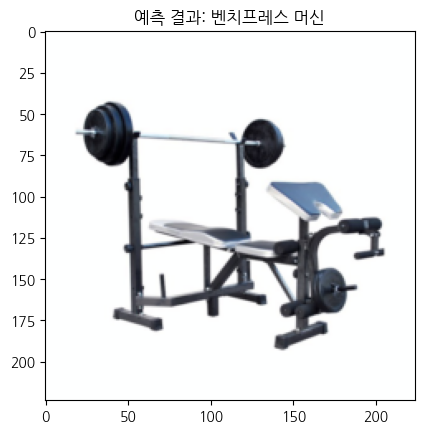

[예측 결과: 벤치프레스 머신] (실제 정답: 벤치프레스 머신)


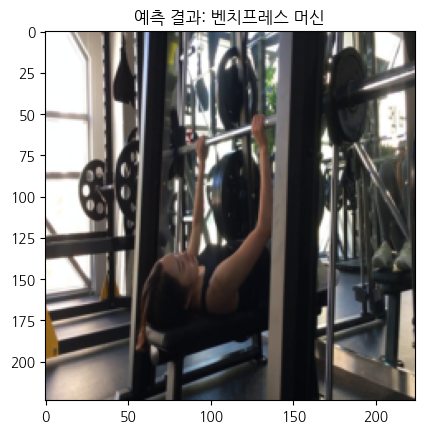

[예측 결과: 벤치프레스 머신] (실제 정답: 렛풀다운머신)


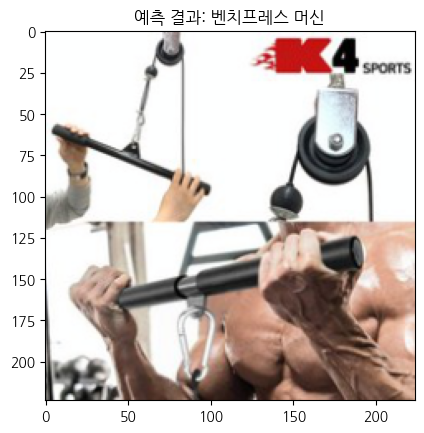

[예측 결과: 숄더프레스머신] (실제 정답: 숄더프레스머신)


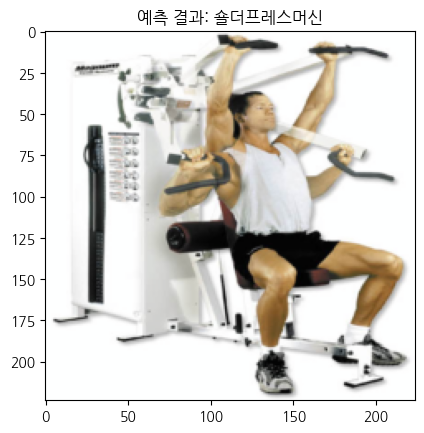

[예측 결과: 렛풀다운머신] (실제 정답: 렛풀다운머신)


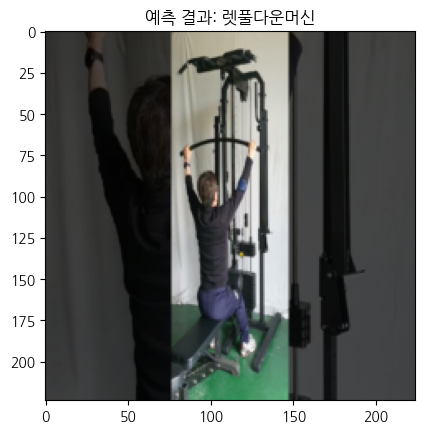

[예측 결과: 렛풀다운머신] (실제 정답: 렛풀다운머신)


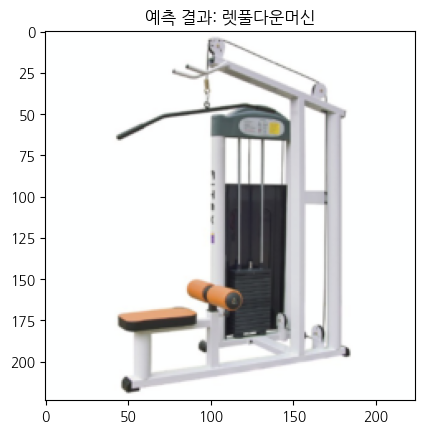

[예측 결과: 숄더프레스머신] (실제 정답: 숄더프레스머신)


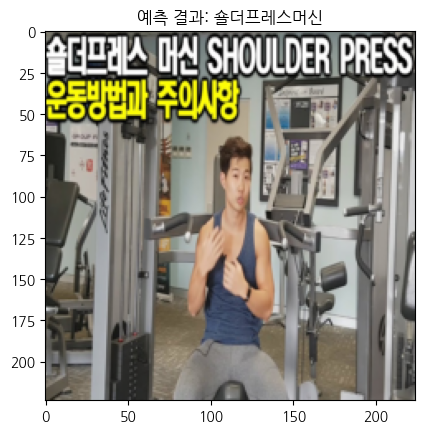

[예측 결과: 숄더프레스머신] (실제 정답: 숄더프레스머신)


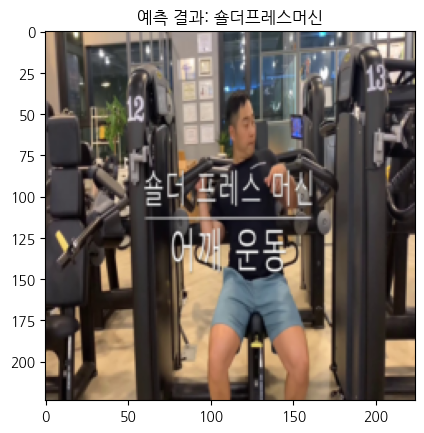

[예측 결과: 렛풀다운머신] (실제 정답: 렛풀다운머신)


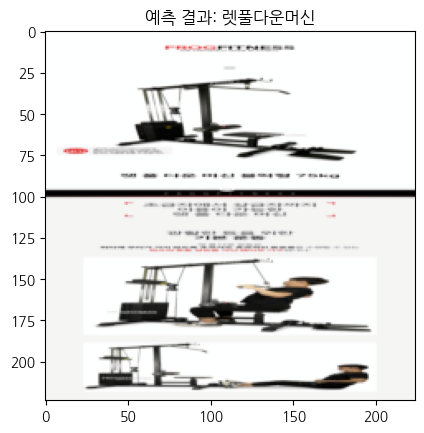

[예측 결과: 숄더프레스머신] (실제 정답: 렛풀다운머신)


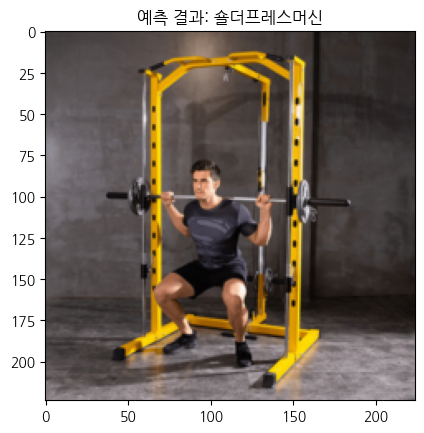

[Test Phase] Loss: 0.3979 Acc: 80.0000% Time: 4.0432s


In [12]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [13]:
!pip install flask-ngrok
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=9b400a6000a96309a473a23d2da20598ae1c35c8dace024d2b92217ef38d4ef4
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [14]:
!ngrok config add-authtoken YourTokenHere

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [15]:
!pip install flask_cors

In [16]:
import io
from PIL import Image
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request
from flask_cors import  CORS, cross_origin

def get_predict(image_bytes) :
  image = Image.open(io.BytesIO(image_bytes))
  image = transforms_test(image).unsqueeze(0).to(device)

  with torch.no_grad() :
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측결과' + class_names[preds[0]])

  return class_names[preds[0]]

app = Flask(__name__)
CORS(app)
@app.route('/', methods=['POST'])
@cross_origin(origins = "http://127.0.0.1:5500")
def predict() :
  if request.method == 'POST' :
    file = request.files['file']
    image_bytes = file.read()

    class_name = get_predict(image_bytes=image_bytes)
    print("결과 : ", {'class_name' : class_name})
    return jsonify({'class_name' : class_name})

In [ ]:
run_with_ngrok(app)
app.run()